In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

/Users/detkoale/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#  Гамма распределение

Зададим параметры гамма распределения

In [83]:
k = 2
theta = 1

Сгенерируем выборку объемом 1000

In [84]:
gamma_rv = sts.gamma(k, scale = theta)
sample = gamma_rv.rvs(size=1000)

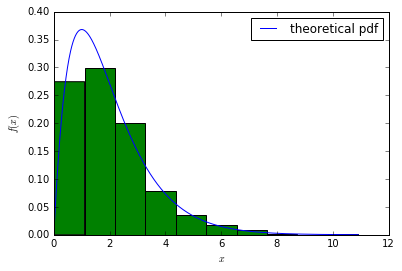

In [85]:
#Определим соответствующий отрезок для отображения плотности распределения
x = np.linspace(np.min(sample),np.max(sample),1000)
gamma_pdf = gamma_rv.pdf(x)

#Построим график плотности распределения
plt.plot(x, gamma_pdf, label="theoretical pdf")
plt.legend()
#Построим гистограмму выборки
plt.hist(sample, normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Считаем теоретические мат ожидание и дисперсию

In [144]:
me = k*theta
var = k*theta**2
sigma = np.sqrt(var)

Автоматизируем генерацию выборок объема n и подсчет выборочных средних

In [140]:
def printChoiceMean(sample, sub_sample_size):
    means = []
    #Считаем выборочные средние выборок заданного объема из изначальной выборки
    for i in range(len(sample)):
        sub_sample = np.random.choice(sample, size=sub_sample_size)
        means.append(np.mean(sub_sample))
    
    #Рассчитываем мат ожидание для выборочных средних
    sub_sample_mean = np.mean(means)
    #Рассчитываем стандартное отклонение для выборочных средних
    estimSigma = np.std(means)
    #Рассчитываем сигму отклонение для аппроксимирующего нормального распределения
    approxSigma = sigma/np.sqrt(sub_sample_size)
    
    norm_rv = sts.norm(me, approxSigma)
    
    print "Теоретическое среднее {:,.2f} и приближенное среднее {:,.2f}".format(me,sub_sample_mean)
    print "Теоретическое стандартное отклонение {:,.2f} и приближенное стандартное отклонение {:,.2f}".format(approxSigma,estimSigma)
    
    #Рисуем графики
    plt.plot(x, norm_rv.pdf(x), label='Theoretical')
    plt.legend()
    plt.hist(means, normed=True)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

Теоретическое среднее 2.00 и приближенное среднее 2.04
Теоретическое стандартное отклонение 0.63 и приближенное стандартное отклонение 0.65


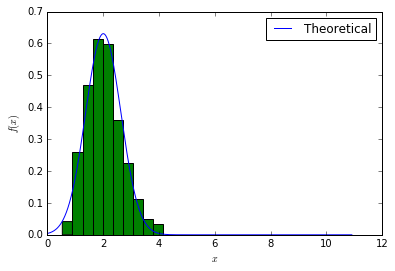

In [141]:
printChoiceMean(sample, 5)

Теоретическое среднее 2.00 и приближенное среднее 1.98
Теоретическое стандартное отклонение 0.45 и приближенное стандартное отклонение 0.45


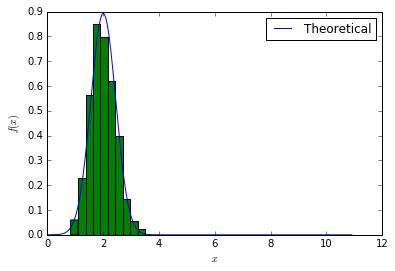

In [142]:
printChoiceMean(sample, 10)

Теоретическое среднее 2.00 и приближенное среднее 2.01
Теоретическое стандартное отклонение 0.20 и приближенное стандартное отклонение 0.20


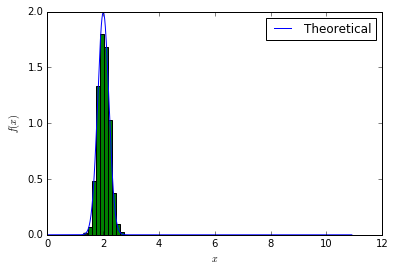

In [143]:
printChoiceMean(sample, 50)

### Вывод: при увеличении объема выборки увеличивается точность приближения исходной выборки нормальным распределением средней выборки